<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%5BPart4%2C_Chap11%5D_%E1%84%89%E1%85%A5%E1%86%AB%E1%84%92%E1%85%A7%E1%86%BC_%EB%B6%84%EB%A5%98_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8_%EB%B9%84%ED%96%89%EA%B2%BD%ED%97%98%EB%A7%8C%EC%A1%B1%EB%8F%84%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA, 탐색적 데이터 분석

입력: (22개) 개인정보, 설문정보, 여행정보\
출력: (1개) 비행의 만족도 (종속변수)

In [1]:
import numpy as np

seed = 1234
np.random.seed(seed)

## 데이터 로드

In [2]:
import pandas as pd

# 데이터 경로 지정 및 읽어오기
data_path = '/content/Invistico_Airline.csv'
airplane = pd.read_csv(data_path)

# 데이터 꼴 확인
airplane.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## 기본 분석 및 기초 통계 분석

In [3]:
# 기본 정보
print('#'*20, '기본 정보', '#'*20)
airplane.info() # info() 안에서 자동으로 print를 진행

# 기초 통계량
summary_statistics = airplane.describe(include='all')
print('#'*20, '기초 통계량', '#'*20)
print(summary_statistics)

#################### 기본 정보 ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int6

누락이 있음!!

In [4]:
airplane.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [5]:
## 데이터 자료형에 따른 column 구분

y_column = ['satisfaction']
numeric_columns = ['Age', 'Flight Distance',
                   'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_columns = ['Seat comfort', 'Departure/Arrival time convenient',
                   'Food and drink', 'Gate location',
                   'Inflight wifi service', 'Inflight entertainment',
                   'Online support', 'Ease of Online booking',
                   'On-board service', 'Leg room service',
                   'Baggage handling', 'Checkin service',
                   'Cleanliness', 'Online boarding']
category_columns = ['Gender', 'Customer Type',
                    'Type of Travel', 'Class']

데이터타임\
수치형\
서문형 (Ordinal)
- 순서나 등급을 나타냄
- 순서는 중요하지만 그차이는 균일하지않음
- 설문조사, 학점, 통증 수준등\


범주형


## 수치형 데이터 분석

### 분포 확인

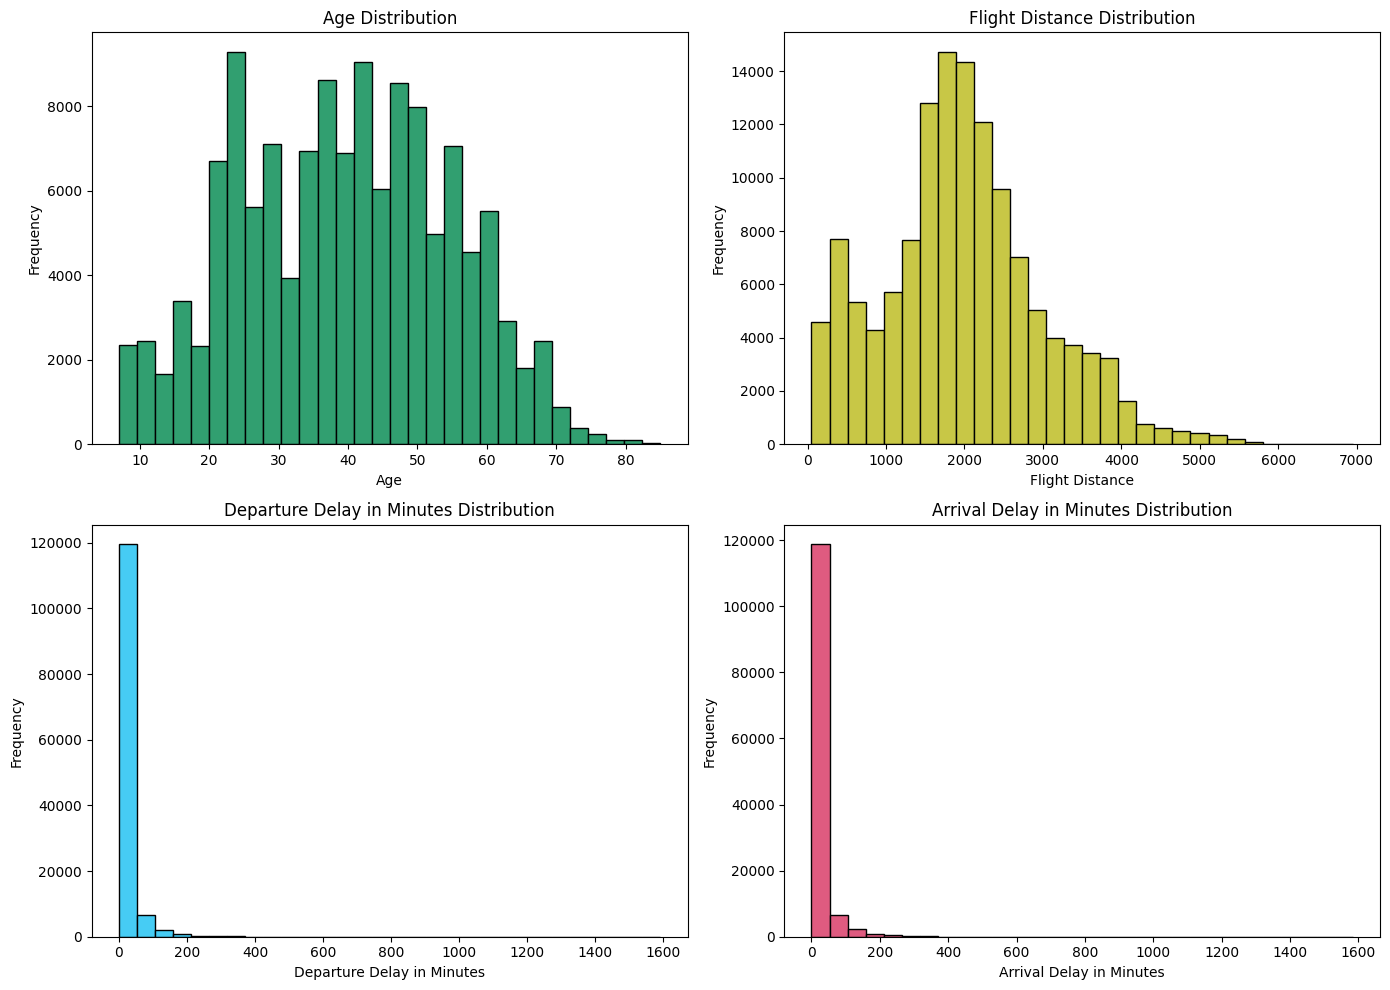

In [6]:
# 전체 데이터 분포 확인

numeric_data = airplane[numeric_columns]

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))

np.random.seed(seed)
for idx, numeric in enumerate(numeric_columns) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.subplot(2, 2, idx+1)
    plt.hist(numeric_data[numeric], bins=30, color=col, edgecolor='black')
    plt.title(f'{numeric} Distribution')
    plt.xlabel(numeric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Delay 관계도가 상관관계가 깊겠다고 생각. 결과에 큰 영향을 미칠수 있음.\
하지만 값이 극단적임

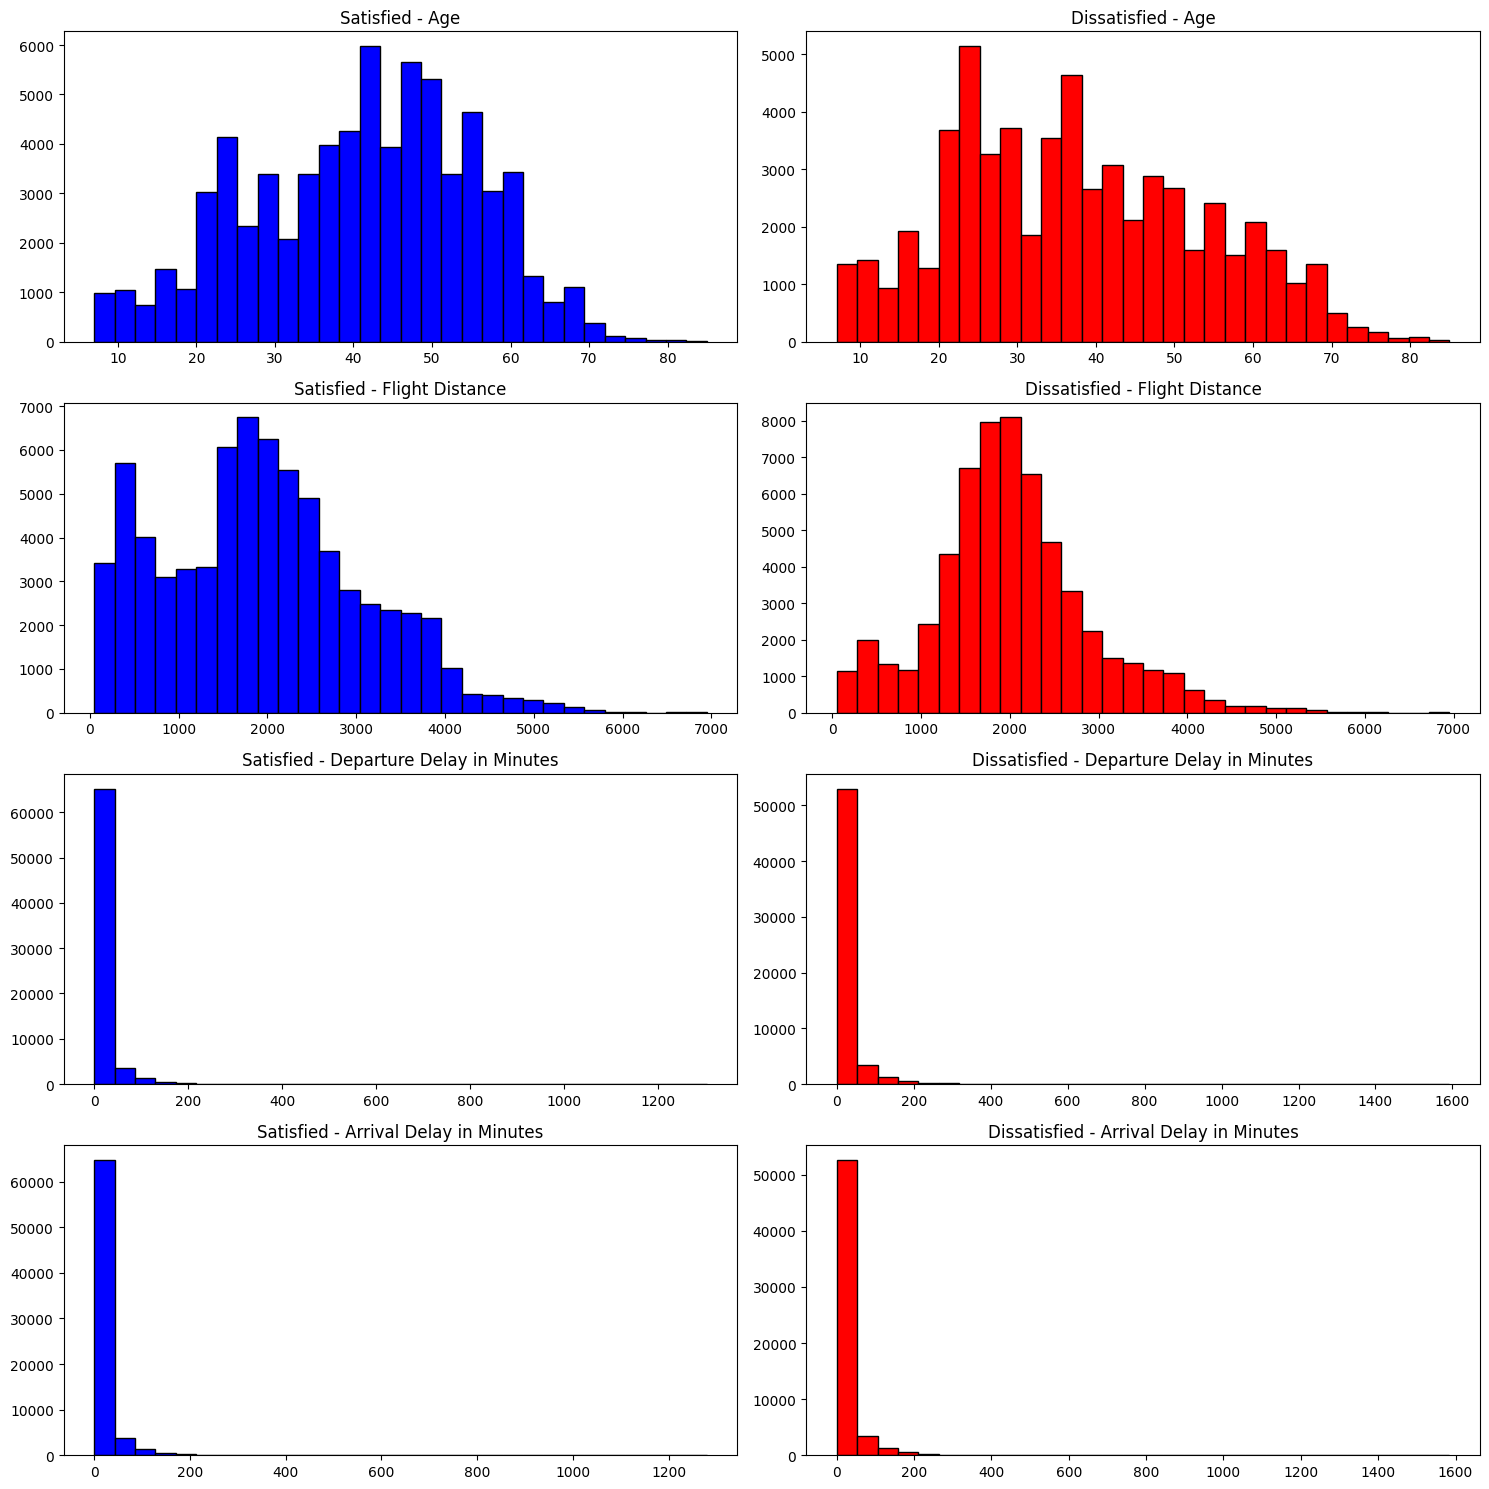

In [7]:
# 클래스 별 시각화
satisfied = airplane[airplane['satisfaction'] == 'satisfied']
dissatisfied = airplane[airplane['satisfaction'] == 'dissatisfied']

plt.figure(figsize=(15, 15))

for idx, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 2, 2*idx + 1)
    plt.hist(satisfied[column], color='blue', label='Satisfied', bins=30, edgecolor='black')
    plt.title(f'Satisfied - {column}')

    plt.subplot(len(numeric_columns), 2, 2*idx + 2)
    plt.hist(dissatisfied[column], color='red', label='Dissatisfied', bins=30, edgecolor='black')
    plt.title(f'Dissatisfied - {column}')

plt.tight_layout()
plt.show()

만족도별로 시각화!
delay 시간 상세분석

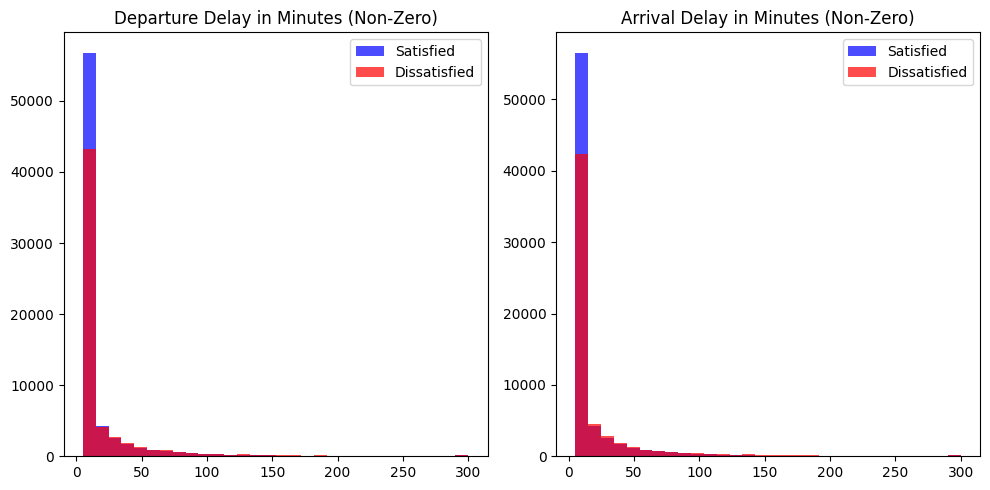

In [9]:
# 특정 시간을 기준으로 clipping 한 결과 시각화

def clip_delays(df, min_value, max_value):
    df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].clip(min_value, max_value)
    df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].clip(min_value, max_value)
    return df

min_delay = 5
max_delay = 300

satisfied_clipped = clip_delays(satisfied.copy(), min_delay, max_delay)
dissatisfied_clipped = clip_delays(dissatisfied.copy(), min_delay, max_delay)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(satisfied_clipped['Departure Delay in Minutes'], color='blue', label='Satisfied', bins=30, alpha=0.7)
plt.hist(dissatisfied_clipped['Departure Delay in Minutes'], color='red', label='Dissatisfied', bins=30, alpha=0.7)
plt.title('Departure Delay in Minutes (Non-Zero)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(satisfied_clipped['Arrival Delay in Minutes'].dropna(), color='blue', label='Satisfied', bins=30, alpha=0.7)
plt.hist(dissatisfied_clipped['Arrival Delay in Minutes'].dropna(), color='red', label='Dissatisfied', bins=30, alpha=0.7)
plt.title('Arrival Delay in Minutes (Non-Zero)')
plt.legend()

plt.tight_layout()
plt.show()

### 아웃라이어 확인

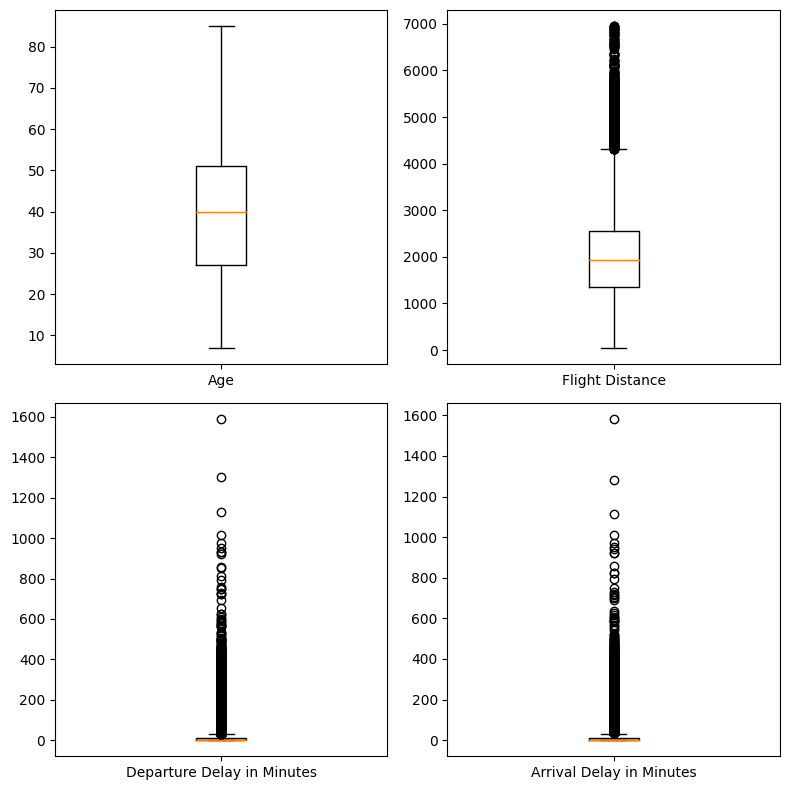

In [ ]:
plt.figure(figsize=(8, 8))

np.random.seed(seed)
for idx, numeric in enumerate(numeric_columns) :

    plt.subplot(2, 2, idx+1)
    plt.boxplot(numeric_data[numeric].dropna(), labels=[numeric])

plt.tight_layout()
plt.show()

delay 를 outlier 라고 생각!


### 상관관계

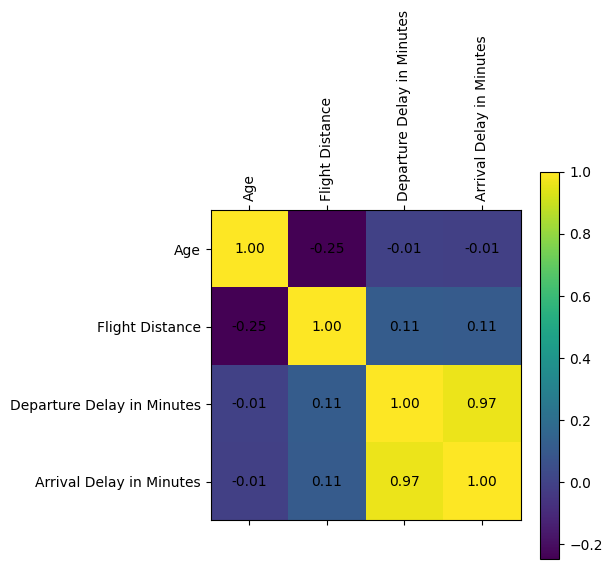

#################### 상관관계 값 확인 ####################
                                 Age  Flight Distance  \
Age                         1.000000        -0.249625   
Flight Distance            -0.249625         1.000000   
Departure Delay in Minutes -0.009041         0.112555   
Arrival Delay in Minutes   -0.011248         0.110103   

                            Departure Delay in Minutes  \
Age                                          -0.009041   
Flight Distance                               0.112555   
Departure Delay in Minutes                    1.000000   
Arrival Delay in Minutes                      0.965291   

                            Arrival Delay in Minutes  
Age                                        -0.011248  
Flight Distance                             0.110103  
Departure Delay in Minutes                  0.965291  
Arrival Delay in Minutes                    1.000000  


In [10]:
correlation_matrix = numeric_data.corr()

# 상관관계 메트릭스 시각화
plt.figure(figsize=(5, 5))

plt.matshow(correlation_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, '{:0.2f}'.format(val), ha='center', va='center', color='black')

plt.show()

# 상관관계 값 프린트
print('#'*20, '상관관계 값 확인', '#'*20)
print(correlation_matrix)

## 서수형 데이터 분석


### 분포 확인

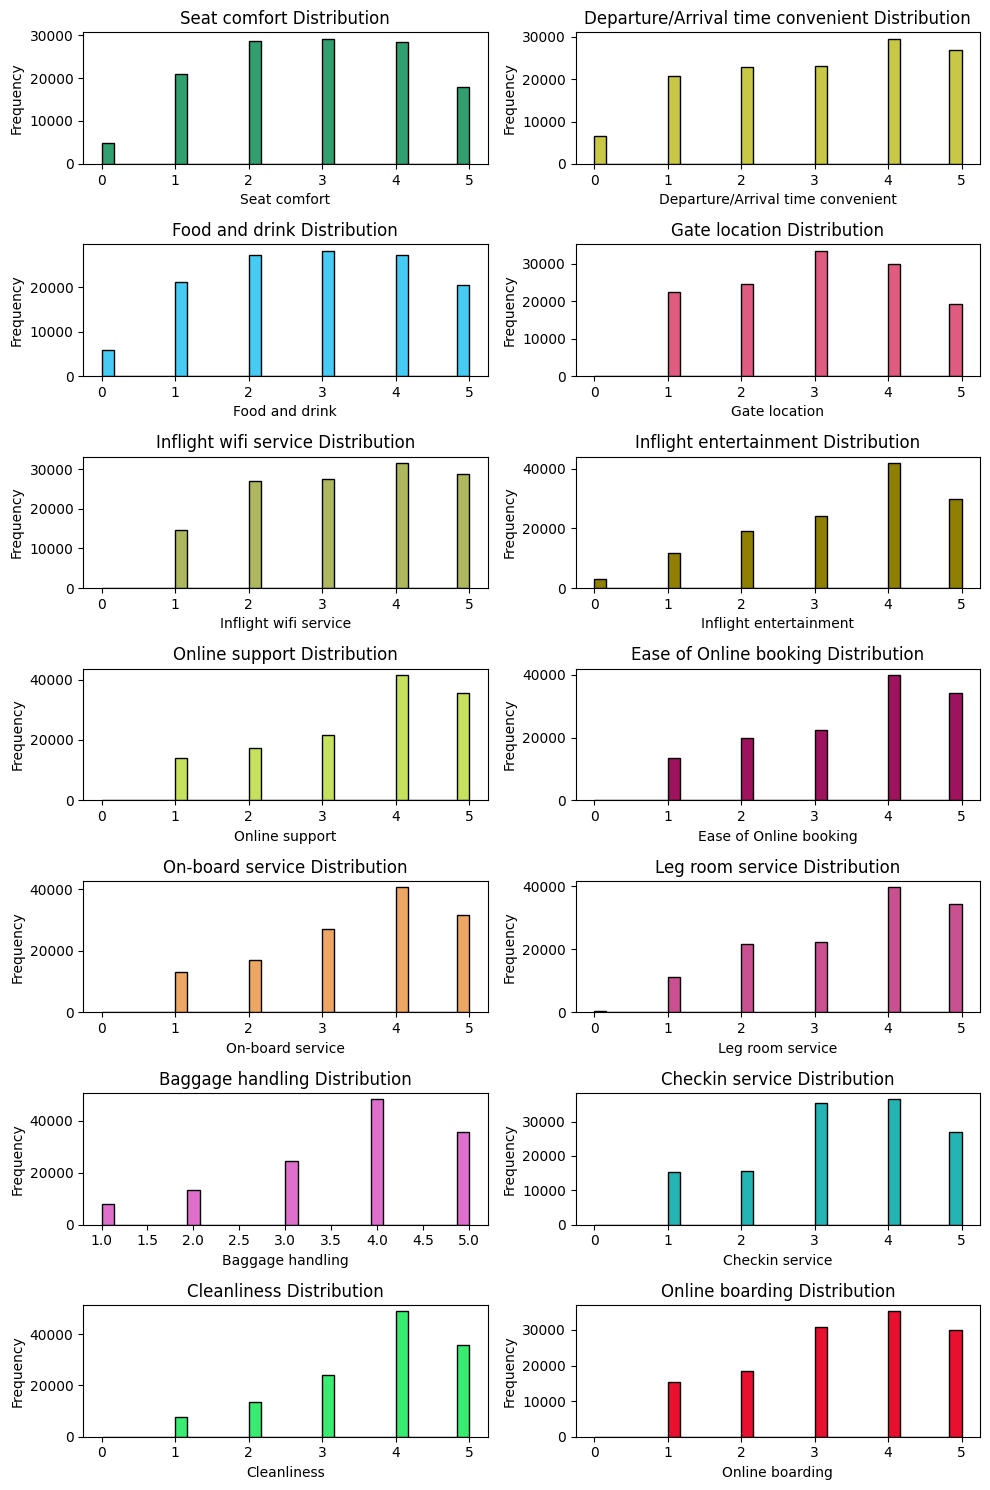

In [11]:
# 전체 데이터 분포 확인
ordinal_data = airplane[ordinal_columns]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))

np.random.seed(seed)
for idx, ordinal in enumerate(ordinal_data) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.subplot(7, 2, idx+1)
    plt.hist(ordinal_data[ordinal], bins=30, color=col, edgecolor='black')
    plt.title(f'{ordinal} Distribution')
    plt.xlabel(ordinal)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

극단적으로 답변이 치우친 문항은 없어보임
- 모델개발입장\
특별히 주의할 변수는 보이지않음\
대신 각 변수마다 보이는 분포는 상이함\
상위점에 몰림현상\
중간점수에 몰림현상

- 서비스개선의 입장\

잘하고 있는것과\
개선이 필요한 부분 (Food Drink, Seat Comfort)

만족, 불만족 별 시각화

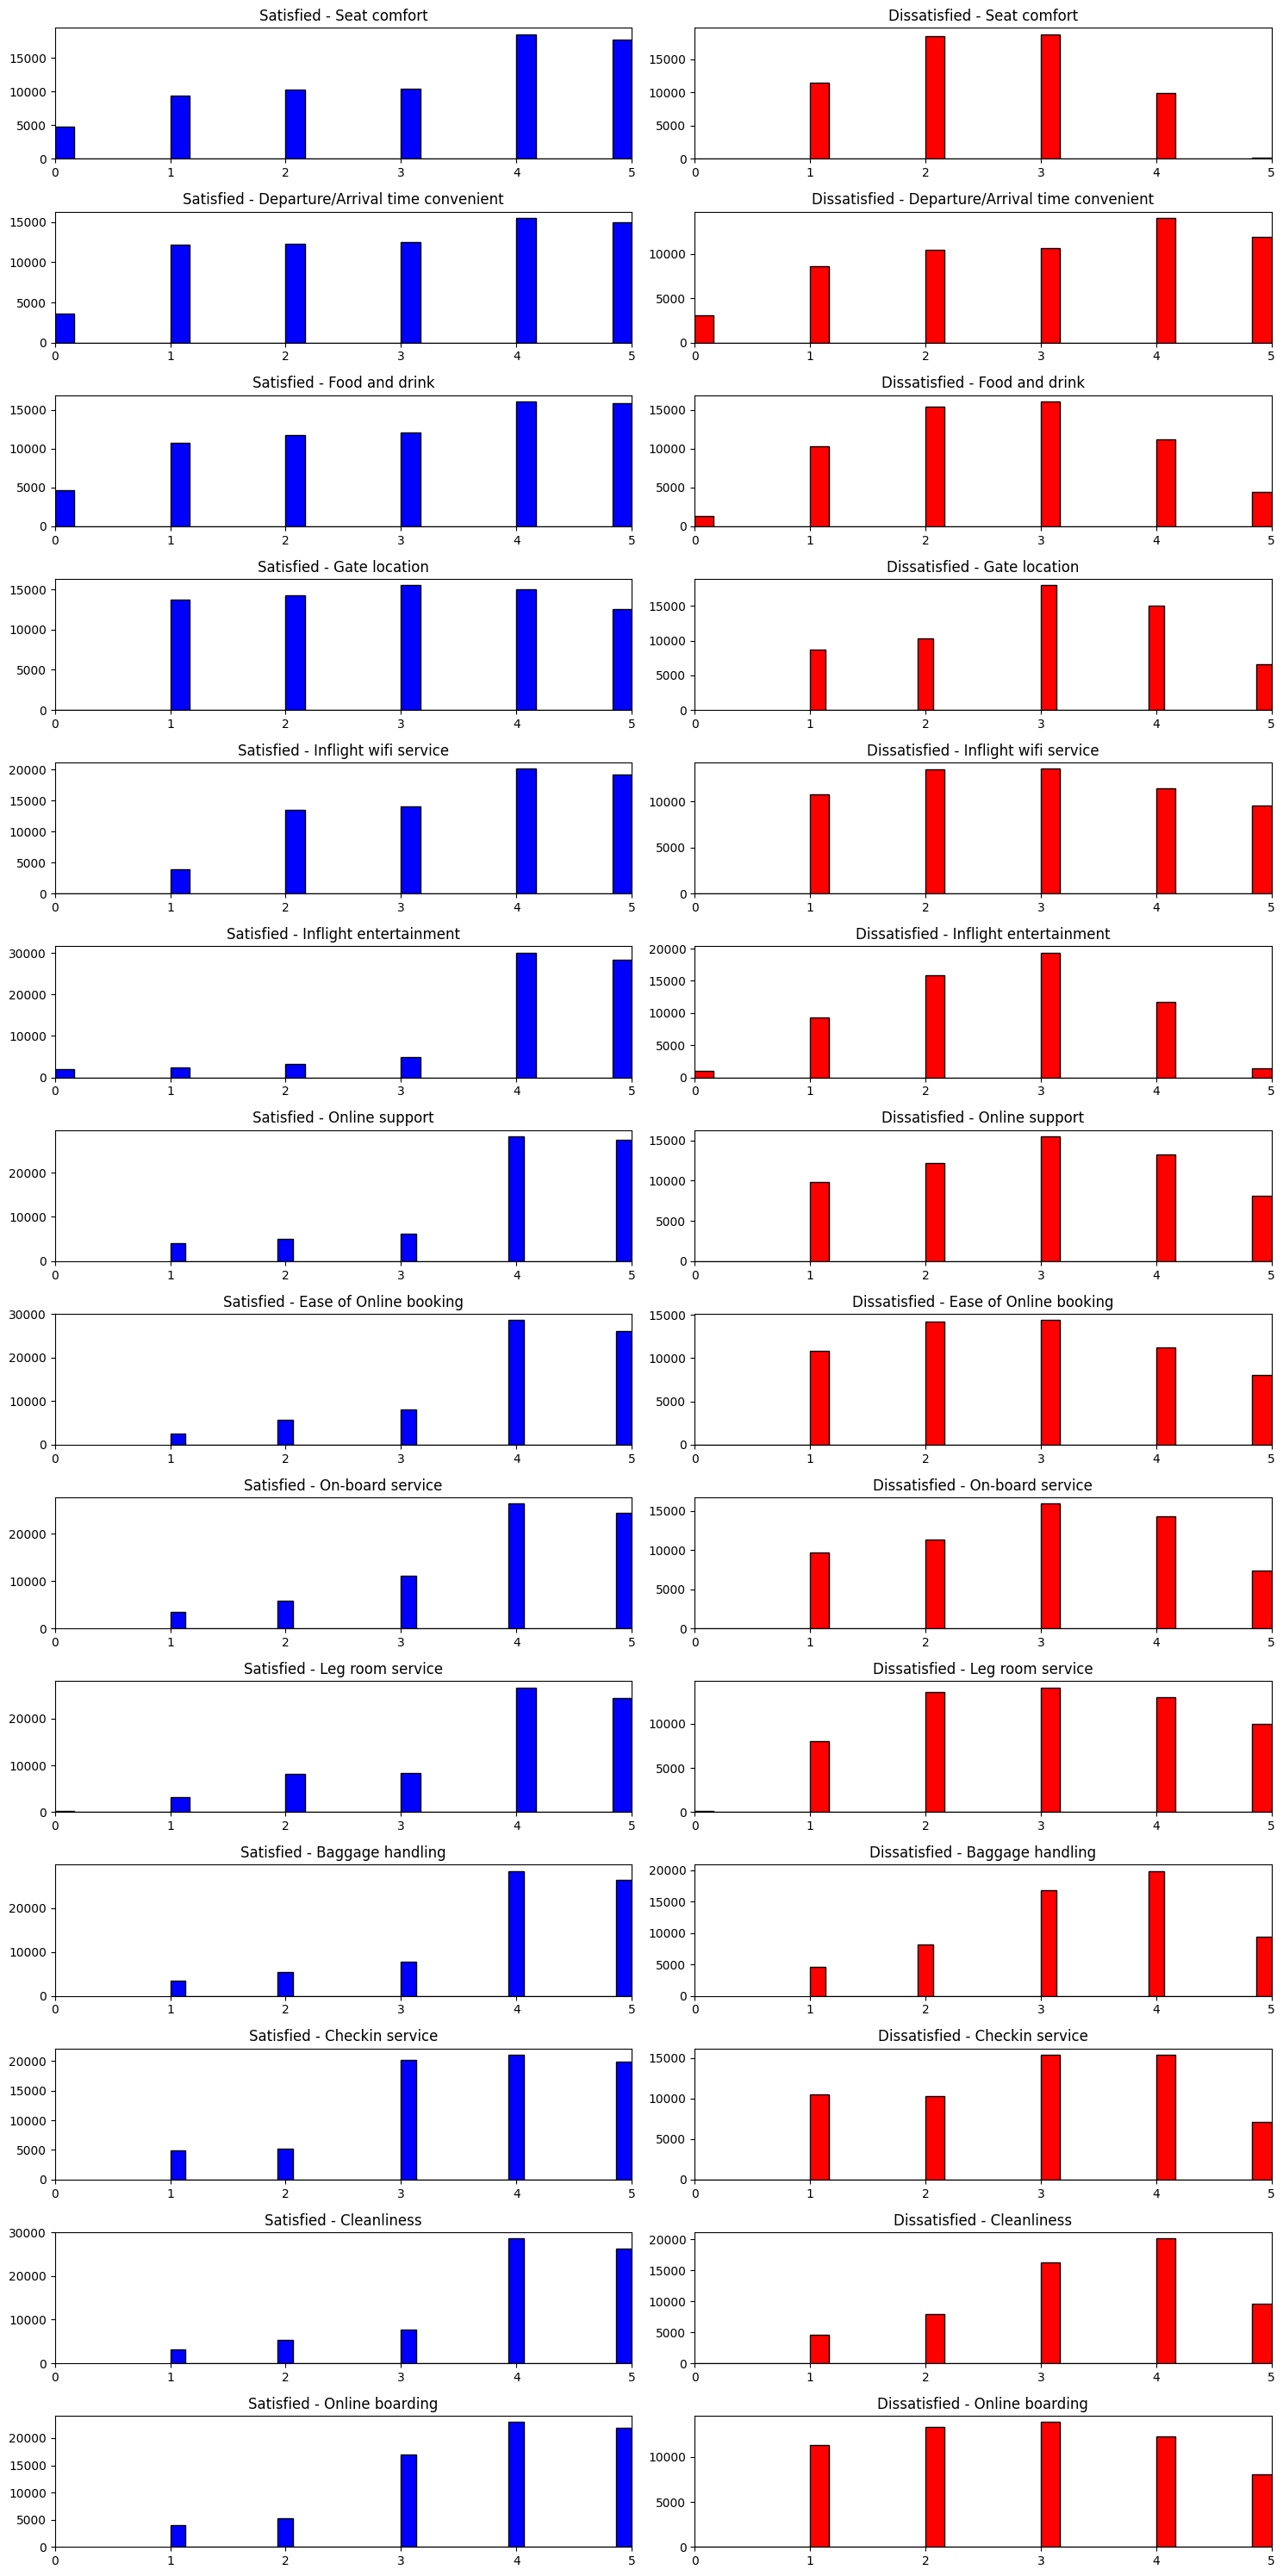

In [12]:
# 클래스 별 시각화
plt.figure(figsize=(15, 30))

for idx, column in enumerate(ordinal_columns):
    plt.subplot(len(ordinal_columns), 2, 2*idx + 1)
    plt.hist(satisfied[column], color='blue', label='Satisfied', bins=30, edgecolor='black')
    plt.xlim(0, 5)
    plt.title(f'Satisfied - {column}')

    plt.subplot(len(ordinal_columns), 2, 2*idx + 2)
    plt.hist(dissatisfied[column], color='red', label='Dissatisfied', bins=30, edgecolor='black')
    plt.xlim(0, 5)
    plt.title(f'Dissatisfied - {column}')

plt.tight_layout()
plt.show()

실제 모델입장에서 중요한 역할을 하겠구나 파악

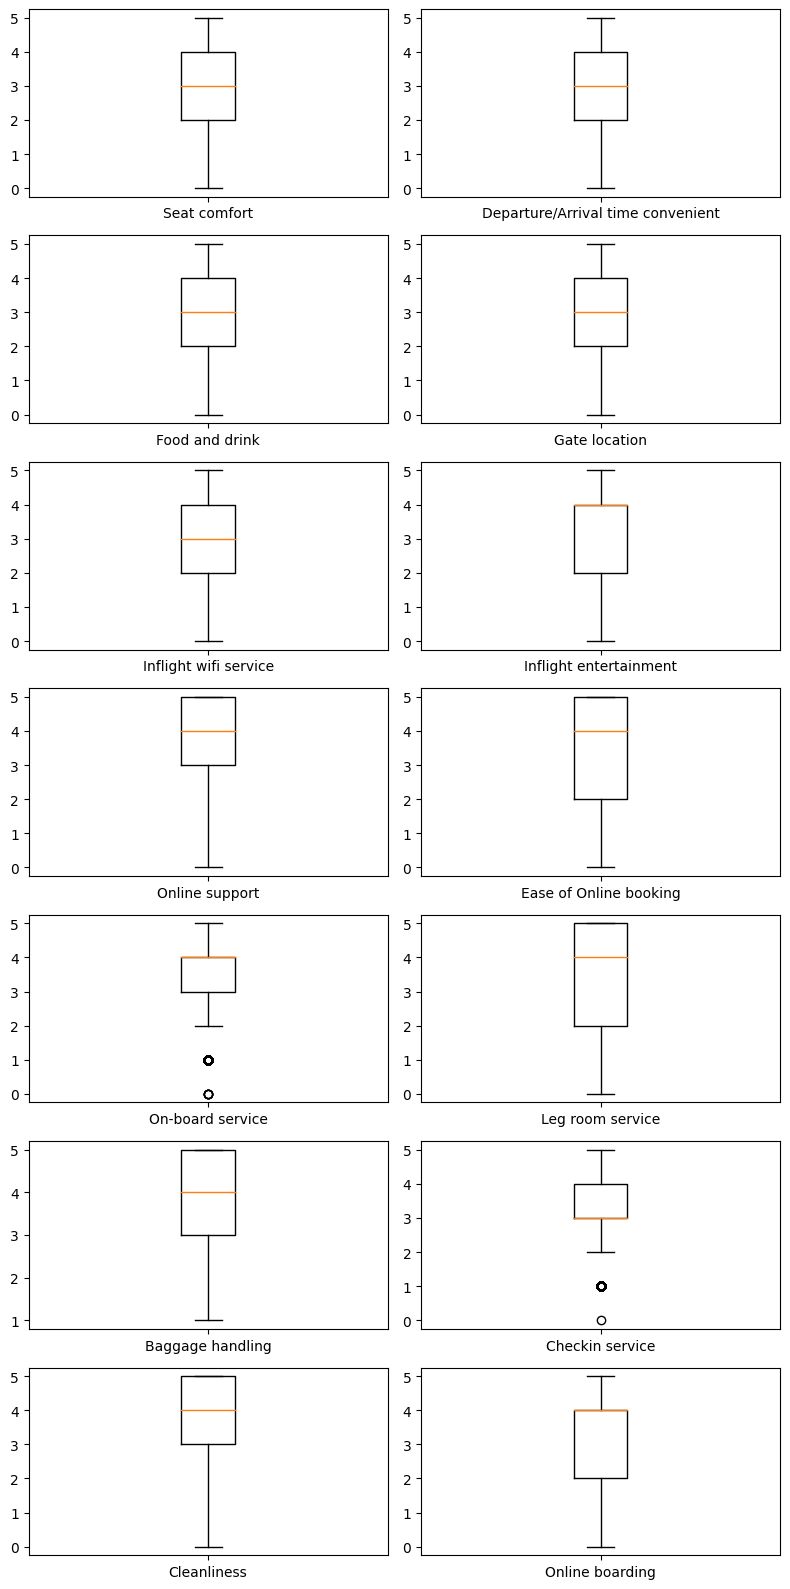

In [13]:
# 전반적인 평균과 치우침 확인
plt.figure(figsize=(8, 16))

np.random.seed(seed)
for idx, ordinal in enumerate(ordinal_columns) :

    plt.subplot(len(ordinal_columns)//2, 2, idx+1)
    plt.boxplot(ordinal_data[ordinal].dropna(), labels=[ordinal])

plt.tight_layout()
plt.show()

### 상관관계

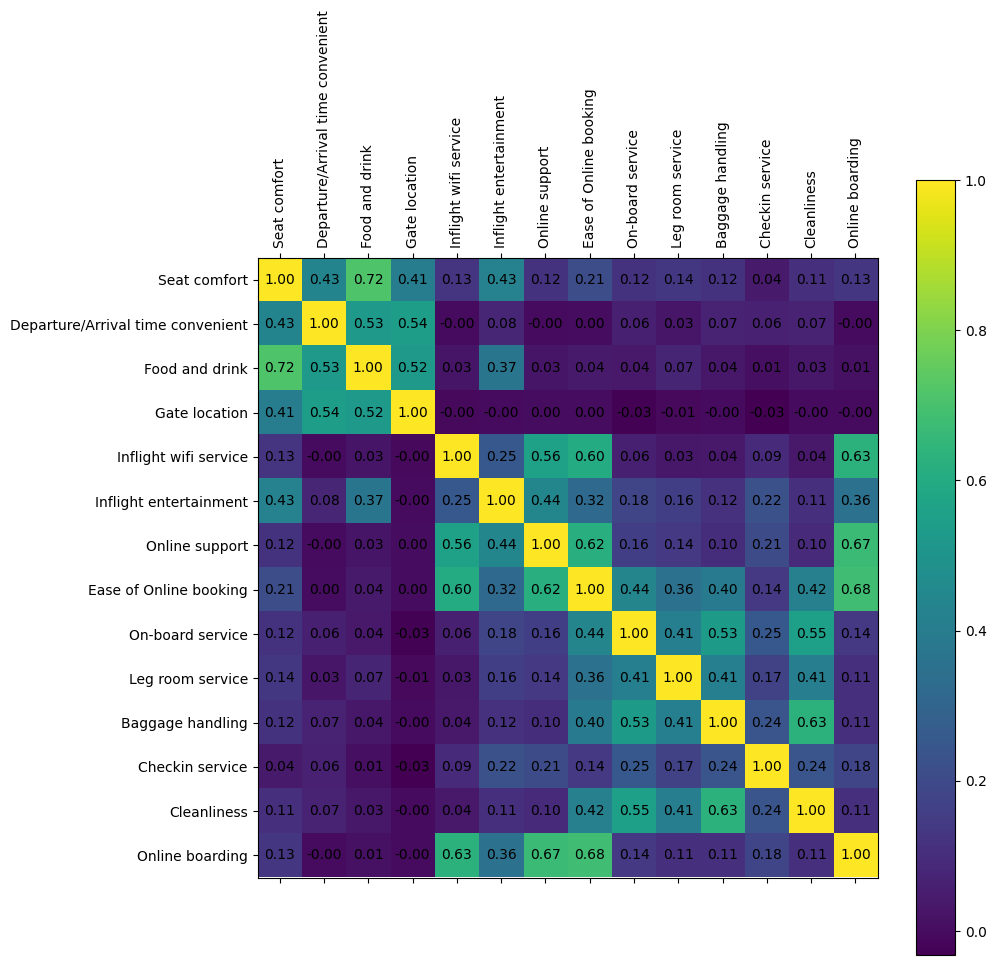

In [14]:
correlation_matrix = ordinal_data.corr()

# 상관관계 메트릭스 시각화
plt.figure(figsize=(10, 10))

plt.matshow(correlation_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, '{:0.2f}'.format(val), ha='center', va='center', color='black')

plt.show()

# # 상관관계 값 프린트 > 너무 길어서 생략
# print('#'*20, '상관관계 값 확인', '#'*20)
# print(correlation_matrix)

특정 문항 상이에 높은 상관관계, 하지만 다른 변수를 대체할 만큼 상관관계 값이 크지는 않아보임


## 범주형 데이터 분석

### 분포 확인

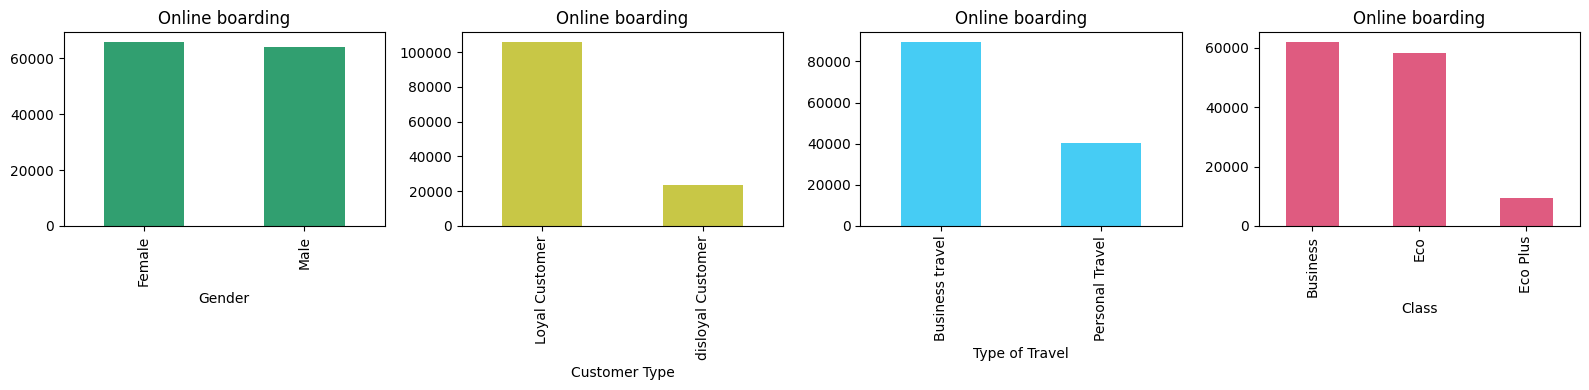

In [15]:
# 전체 데이터 분포 확인
category_data = airplane[category_columns]

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))

np.random.seed(seed)
for idx, category in enumerate(category_columns) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.subplot(1, 4, idx+1)
    category_data[category].value_counts().plot(kind='bar', color=col)
    plt.title(column)
    plt.tight_layout()

plt.tight_layout()
plt.show()

카운팅으로 본것!

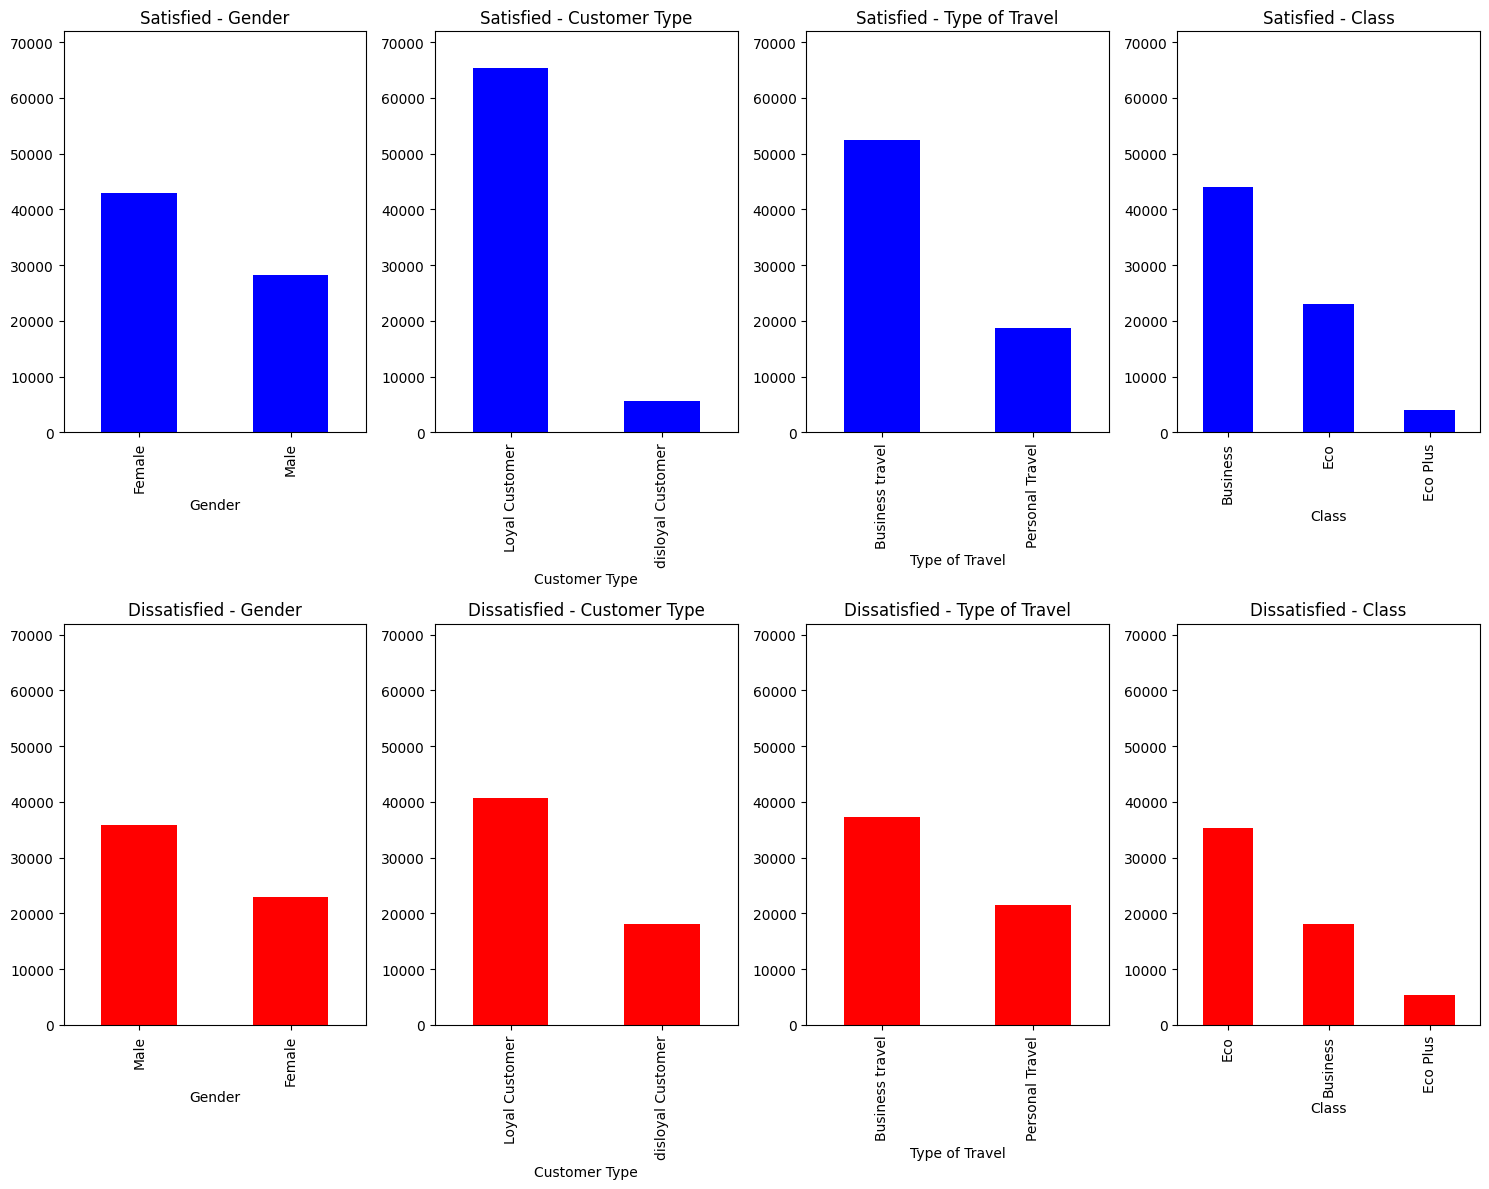

In [16]:
# 클래스 별 시각화
plt.figure(figsize=(15, 12))

max_count_satisfied = max(satisfied[column].value_counts().max() for column in category_columns)
max_count_dissatisfied = max(dissatisfied[column].value_counts().max() for column in category_columns)
max_count = max(max_count_satisfied, max_count_dissatisfied) * 1.1

for idx, column in enumerate(category_columns):
    plt.subplot(2, 4, idx + 1)
    satisfied[column].value_counts().plot(kind='bar', color='blue')
    plt.title(f'Satisfied - {column}')
    plt.ylim(0, max_count)
    plt.tight_layout()

    plt.subplot(2, 4, idx + 5)
    dissatisfied[column].value_counts().plot(kind='bar', color='red')
    plt.title(f'Dissatisfied - {column}')
    plt.ylim(0, max_count)
    plt.tight_layout()

plt.show()

# 데이터 전처리

## NA 값 및 EDA를 기반으로 제거할 값 제거

na 제거\
timelimit=300\
129149 개데이터 남음

In [21]:
airplane_cleaned = airplane.dropna() # na값 제거
time_limit = 300 # 지연 시간 5시간 이상은 제거
airplane_cleaned = airplane_cleaned[(airplane_cleaned['Arrival Delay in Minutes'] < time_limit) &
                                    (airplane_cleaned['Departure Delay in Minutes'] < time_limit)]

airplane_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129149 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129149 non-null  object 
 1   Gender                             129149 non-null  object 
 2   Customer Type                      129149 non-null  object 
 3   Age                                129149 non-null  int64  
 4   Type of Travel                     129149 non-null  object 
 5   Class                              129149 non-null  object 
 6   Flight Distance                    129149 non-null  int64  
 7   Seat comfort                       129149 non-null  int64  
 8   Departure/Arrival time convenient  129149 non-null  int64  
 9   Food and drink                     129149 non-null  int64  
 10  Gate location                      129149 non-null  int64  
 11  Inflight wifi service              129149 no

## 카테고리형 변수 인코딩


종속변수 : 만족도\
독립변수: 성별, 고객유형, 여행유형, 클래스

In [22]:
airplane_cate_encoded = pd.get_dummies(airplane_cleaned[category_columns], drop_first=True)
airplane_target_encoded = pd.get_dummies(airplane_cleaned[y_column], drop_first=True)


airplane_combined = pd.concat([airplane_target_encoded,
                               airplane_cleaned[numeric_columns + ordinal_columns],
                               airplane_cate_encoded],
                              axis=1)
airplane_combined

,satisfaction_satisfied,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,True,65,265,0,0.0,0,0,0,2,2,...,0,3,5,3,2,False,False,True,True,False
2,True,15,2138,0,0.0,0,0,0,3,2,...,3,4,4,4,2,False,False,True,True,False
3,True,60,623,0,0.0,0,0,0,3,3,...,0,1,4,1,3,False,False,True,True,False
4,True,70,354,0,0.0,0,0,0,3,4,...,0,2,4,2,5,False,False,True,True,False
5,True,30,1894,0,0.0,0,0,0,3,2,...,4,5,5,4,2,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,True,29,1731,0,0.0,5,5,5,3,2,...,3,4,4,4,2,False,True,True,True,False
129876,False,63,2087,174,172.0,2,3,2,4,2,...,3,3,1,2,1,True,True,True,False,False
129877,False,69,2320,155,163.0,3,0,3,3,3,...,3,4,2,3,2,True,True,True,True,False
129878,False,66,2450,193,205.0,3,2,3,2,3,...,2,3,2,1,2,True,True,True,True,False


## 상관 관계가 큰 특성만 취하기!

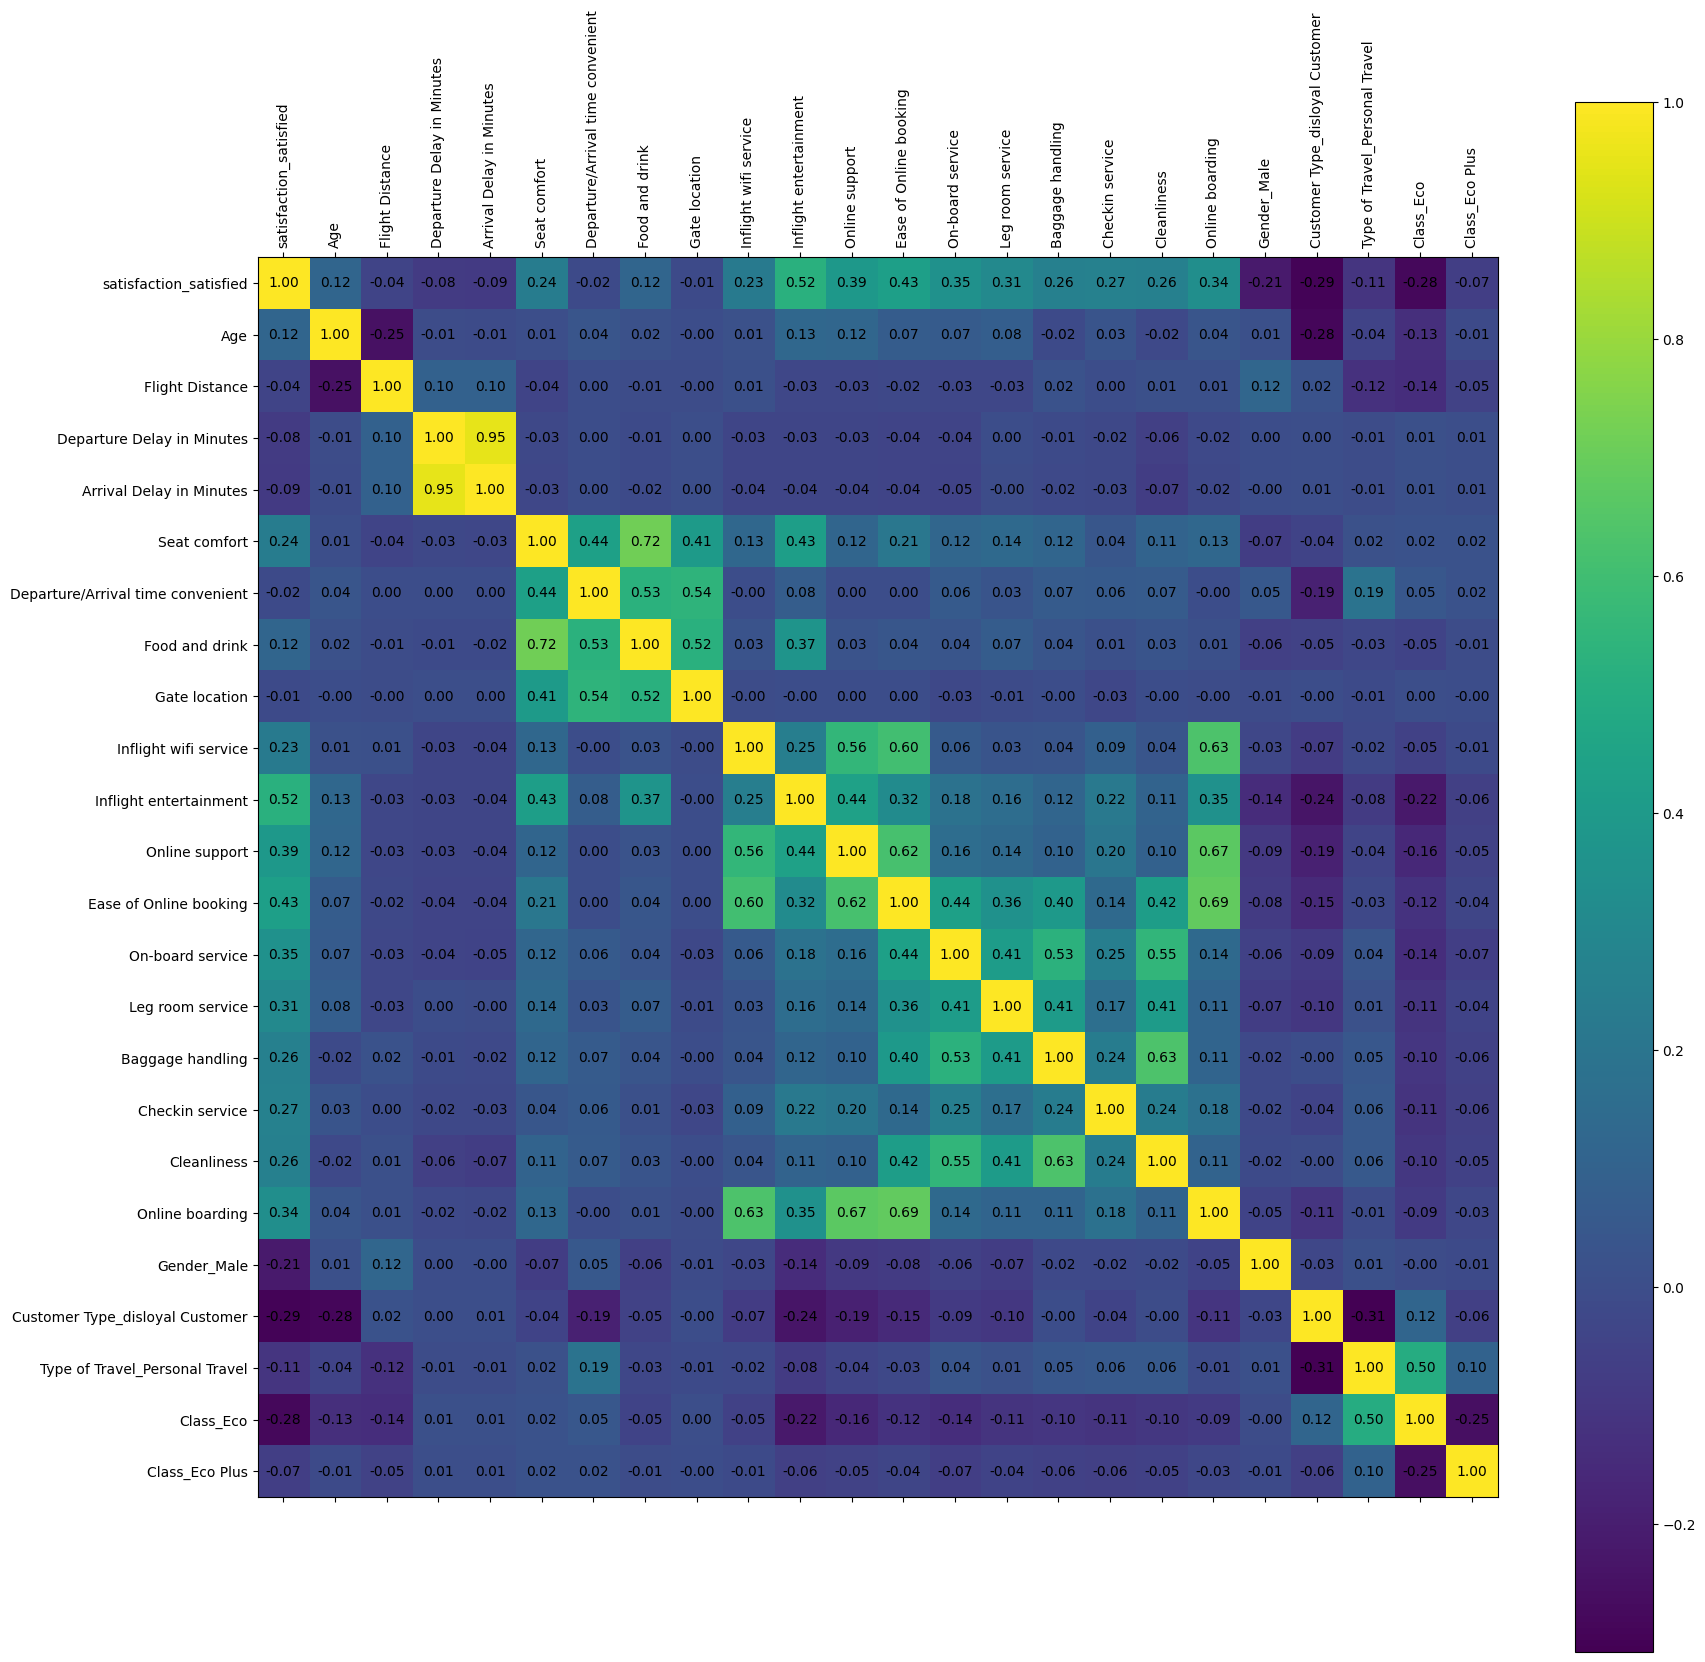

In [23]:
# 모든 변수 간 상관관계를 계산
correlation_matrix_combined = airplane_combined.corr()

plt.figure(figsize=(20, 20))

plt.matshow(correlation_matrix_combined, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix_combined.columns)), correlation_matrix_combined.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_combined.columns)), correlation_matrix_combined.columns)

for (i, j), val in np.ndenumerate(correlation_matrix_combined):
    plt.text(j, i, '{:0.2f}'.format(val), ha='center', va='center', color='black')

plt.show()

In [25]:
# 목표로 하는 target column과 가장 상관관계가 큰 15개를 선택!
select_num = 15
target_correlations = correlation_matrix_combined[airplane_target_encoded.columns[0]].abs().sort_values(ascending=False)
top_features_with_target = target_correlations[1:select_num+1].index.tolist()
top_features_with_target

['Inflight entertainment',
 'Ease of Online booking',
 'Online support',
 'On-board service',
 'Online boarding',
 'Leg room service',
 'Customer Type_disloyal Customer',
 'Class_Eco',
 'Checkin service',
 'Baggage handling',
 'Cleanliness',
 'Seat comfort',
 'Inflight wifi service',
 'Gender_Male',
 'Food and drink']

In [27]:
data = airplane_combined[target_correlations[:select_num+1].index.tolist()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129149 entries, 0 to 129879
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   satisfaction_satisfied           129149 non-null  bool 
 1   Inflight entertainment           129149 non-null  int64
 2   Ease of Online booking           129149 non-null  int64
 3   Online support                   129149 non-null  int64
 4   On-board service                 129149 non-null  int64
 5   Online boarding                  129149 non-null  int64
 6   Leg room service                 129149 non-null  int64
 7   Customer Type_disloyal Customer  129149 non-null  bool 
 8   Class_Eco                        129149 non-null  bool 
 9   Checkin service                  129149 non-null  int64
 10  Baggage handling                 129149 non-null  int64
 11  Cleanliness                      129149 non-null  int64
 12  Seat comfort                     12

In [28]:
# 추출된 특징 이름
# 수치형 데이터는 추출 x
y_column = ['satisfaction_satisfied']
ordinal_columns = ['Inflight entertainment', 'Ease of Online booking',
                   'Online support', 'On-board service',
                   'Online boarding', 'Leg room service',
                   'Checkin service', 'Baggage handling',
                   'Cleanliness', 'Seat comfort',
                   'Inflight wifi service', 'Food and drink']
category_columns = ['Customer Type_disloyal Customer', 'Class_Eco',
                    'Gender_Male']

## 학습 및 평가 데이터 분리


In [29]:
from sklearn.model_selection import train_test_split

X = data.drop(y_column, axis=1)
y = data[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [30]:
print('#'*20, 'X_train', '#'*20)
print(X_train.head, end='\n')
print('#'*20, 'Y_train', '#'*20)
print(y_train.head, end='\n\n')
print('#'*20, 'X_test', '#'*20)
print(X_test.head, end='\n')
print('#'*20, 'Y_test', '#'*20)
print(y_test.head, end='\n')

#################### X_train ####################
<bound method NDFrame.head of         Inflight entertainment  Ease of Online booking  Online support  \
9997                         4                       4               5   
4671                         1                       5               5   
4548                         4                       1               1   
124985                       5                       5               4   
49962                        2                       2               2   
...                        ...                     ...             ...   
128834                       5                       5               5   
104301                       4                       4               5   
867                          1                       5               5   
15900                        4                       5               4   
122649                       4                       5               5   

        On-board service  Onlin

# 모델 구축 및 결과 확인

## 학습 진행

In [ ]:
# 이번 실습에서는 w0에 해당하는 편향(bias) 부분 추가 x

In [31]:
from sklearn.linear_model import LogisticRegression

# 선형 회귀 모델 초기화 및 학습
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)


# 학습된 모델의 계수(coefficients) 및 절편(intercept) 출력
coefficients = logistic_reg.coef_
intercept = logistic_reg.intercept_

print('#'*20, '학습된 파라미터 값', '#'*20)
print(coefficients)

print('#'*20, '학습된 절편 값', '#'*20)
print(intercept)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#################### 학습된 파라미터 값 ####################
[[ 0.73145501  0.3166282   0.09574604  0.27898618  0.11109389  0.21935144
  -1.33676471 -0.93629662  0.25075678  0.06480377  0.04234803  0.25546098
  -0.08643957 -0.99928686 -0.25919007]]
#################### 학습된 절편 값 ####################
[-5.48451267]


w1-15 15개 절편: w0

## 학습 모델 평가 진행

전체개수 분에 맞은개수

In [33]:
from sklearn.metrics import accuracy_score

# 예측 수행
y_train_pred = logistic_reg.predict(X_train)
y_test_pred = logistic_reg.predict(X_test)

# 평가 지표 계산: 정확도 (맞은수/전체)
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print('학습 데이터를 이용한 Acc 값 :', acc_train)
print('평가 데이터를 이용한 Acc 값 :', acc_test)


학습 데이터를 이용한 Acc 값 : 0.8279600073558591
평가 데이터를 이용한 Acc 값 : 0.8287262872628727


confusion matrix, x축은 예측한 결과 y 축은 실제정답

In [34]:
# Confusion matrix 생성을 위한 준비
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

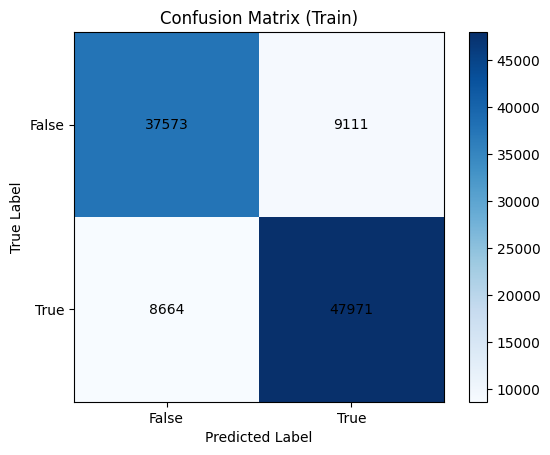

In [35]:
# 학습 데이터를 활용한 confusion matrix

plt.imshow(cm_train, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix (Train)")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_train)))
plt.xticks(tick_marks, np.unique(y_train))
plt.yticks(tick_marks, np.unique(y_train))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# 각 셀에 숫자 표시
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        plt.text(j, i, cm_train[i, j], ha="center", va="center", color="black")


대각선 수치가 크면클수록 ! TT FF 좋은결과값

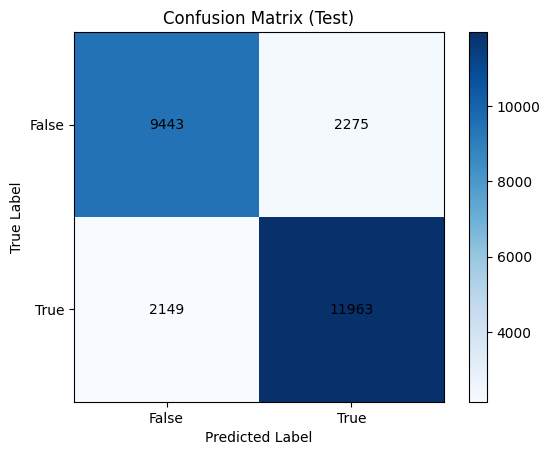

In [36]:
# 평가 데이터를 활용한 confusion matrix

plt.imshow(cm_test, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# 각 셀에 숫자 표시
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        plt.text(j, i, cm_test[i, j], ha="center", va="center", color="black")

## 결과 해석

### 로지스틱 회귀 모델에 영향을 미치는 변수의 중요도

In [37]:
coeff_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': logistic_reg.coef_.flatten()})

# 계수의 절대값을 기준으로 내림차순 정렬
coeff_df['abs_coefficient'] = coeff_df['coefficient'].abs()
coeff_df_sorted = coeff_df.sort_values(by='abs_coefficient', ascending=False)

# 변수의 영향력을 확인
coeff_df_sorted

,feature,coefficient,abs_coefficient
6,Customer Type_disloyal Customer,-1.336765,1.336765
13,Gender_Male,-0.999287,0.999287
7,Class_Eco,-0.936297,0.936297
0,Inflight entertainment,0.731455,0.731455
1,Ease of Online booking,0.316628,0.316628
3,On-board service,0.278986,0.278986
14,Food and drink,-0.259190,0.259190
11,Seat comfort,0.255461,0.255461
8,Checkin service,0.250757,0.250757
5,Leg room service,0.219351,0.219351


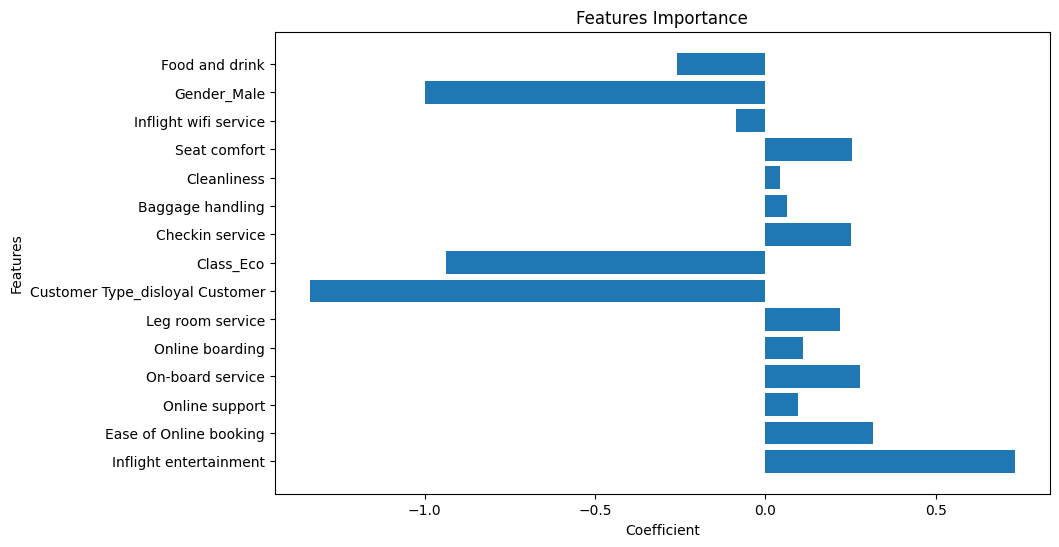

In [38]:
# 변수 영향력 시각화
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, logistic_reg.coef_.flatten())
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Features Importance')
plt.show()

- 변수 엔지니어링을 통한 새로운 모델학습
- 모델의 입력에 해당하는 변수를 새롭게 정의해 다른 모델을 학습
- 아래 경우에 해당하는 학습을 진행\
23개 모든변수 전부활용\
임의로 사용할 변수를 선택\
- EDA 분석을 통해\
제일 의미가 클것 같다고 생각되는 변수 하나만 선택\
상위k개만 선택해서 사용